In the folder “assignment-2-data” there are 32 realization (about 65 k samples each) of a noisy voltage measured with a digital scope. Assuming stationarity and ergodicity perform the following exercises

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Question 1 
Estimate the mean, the variance and standard deviation of some realization; are mean and variance constant over the realizations?

In [2]:
data01 = pd.read_csv('./assignment-2-data/20210301-0002_01.csv',skiprows=1)

In [3]:
data01.describe()

,(ms),(V)
count,89290.000000,89290.000000
mean,5.000184,0.021008
std,2.886906,0.991540
min,0.000000,-3.016271
25%,2.500092,-0.722195
50%,5.000184,0.000000
75%,7.500276,0.722195
max,10.000368,3.398591


In [4]:
data20 = pd.read_csv('./assignment-2-data/20210301-0002_20.csv',skiprows=1)

In [5]:
data20.describe()

,(ms),(V)
count,89290.000000,89290.000000
mean,5.000184,0.017659
std,2.886906,0.987993
min,0.000000,-3.016271
25%,2.500092,-0.722195
50%,5.000184,0.000000
75%,7.500276,0.722195
max,10.000368,3.398591


In [6]:
data30 = pd.read_csv('./assignment-2-data/20210301-0002_30.csv',skiprows=1)
data30.describe()

,(ms),(V)
count,89290.000000,89290.000000
mean,5.000184,0.019101
std,2.886906,0.981749
min,0.000000,-2.846334
25%,2.500092,-0.679595
50%,5.000184,0.000000
75%,7.500276,0.722195
max,10.000368,3.738466


 mean, the variance and standard deviation  are similar: same value is rounded to two decimal digit. 


## Point 2

Estimate the first-order statistics, in particular the distribution function F(x) and the density function f(x). 

Use the statistical frequency interpretation for F(x) and histograms for f(x). Is the process gaussian?

### CDF Estimation

An empirical probability density function can be fit and used for a data sampling using a nonparametric density estimation method, such as Kernel Density Estimation (KDE).

An empirical cumulative distribution function is called the Empirical Distribution Function, or EDF for short. It is also referred to as the Empirical Cumulative Distribution Function, or ECDF.

The EDF is calculated by ordering all of the unique observations in the data sample and calculating the cumulative probability for each as the number of observations less than or equal to a given observation divided by the total number of observations.

EDF(x) = number of observations <= x / n


The statmodels Python library provides the [ECDF class](http://www.statsmodels.org/stable/generated/statsmodels.distributions.empirical_distribution.ECDF.html) for fitting an empirical cumulative distribution function and calculating the cumulative probabilities for specific observations from the domain.

[How to install statsmodels](https://www.statsmodels.org/stable/install.html)

The distribution is fit by calling ECDF() and passing in the raw data sample.


In [7]:
!pip install statsmodels

You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


In [8]:
data_array=  data30.loc[:,"(V)"].T.to_numpy()

In [9]:
data_array

array([ 1.359344 ,  1.359344 ,  0.8495325, ...,  0.1697835, -0.2123831,
        0.1273376])

P(x<1): 0.831
P(x<2): 0.979
P(x<3): 1.000


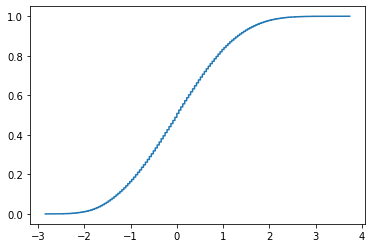

In [10]:
from statsmodels.distributions.empirical_distribution import ECDF
# fit a cdf
ecdf = ECDF(data_array)

# get cumulative probability for values
print('P(x<1): %.3f' % ecdf(1))
print('P(x<2): %.3f' % ecdf(2))
print('P(x<3): %.3f' % ecdf(3))
# plot the cdf
plt.plot(ecdf.x, ecdf.y)
plt.show()

In [11]:
data30.loc[:,"(V)"]


0        1.359344
1        1.359344
2        0.849533
3        0.467212
4        0.042446
           ...   
89285    0.212383
89286   -0.169784
89287    0.169784
89288   -0.212383
89289    0.127338
Name: (V), Length: 89290, dtype: float64

<AxesSubplot:ylabel='Density'>

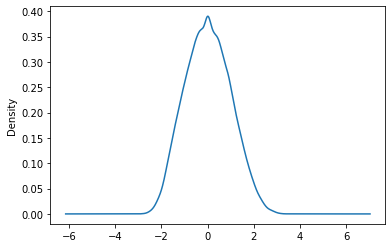

In [12]:
data30.loc[:,"(V)"].plot(kind= 'density')

<AxesSubplot:>

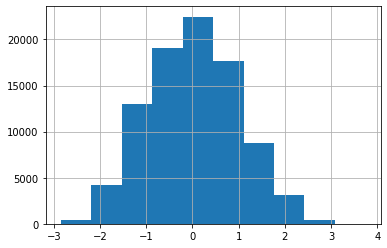

In [13]:
data30.loc[:,"(V)"].hist(bins=10)

<AxesSubplot:>

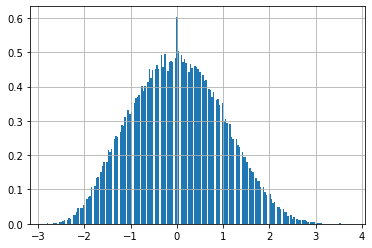

In [14]:
data30.loc[:,"(V)"].hist(bins=200, density=True)

In [15]:
data30_freq= data30.loc[:,"(V)"].value_counts()
data30_freq_sorted=data30_freq.sort_index()
print(data30_freq_sorted)

-2.846334    1
-2.803734    4
-2.761288    1
-2.718842    1
-2.676396    5
            ..
 3.186208    2
 3.228654    2
 3.313546    1
 3.526083    3
 3.738466    1
Name: (V), Length: 147, dtype: int64


In [16]:
data30_freq_sorted.index


Float64Index([-2.846334, -2.803734, -2.761288, -2.718842, -2.676396,  -2.63395,
              -2.591351, -2.548905, -2.506459, -2.464013,
              ...
               2.973671,  3.016271,  3.058717,  3.101163,  3.143609,  3.186208,
               3.228654,  3.313546,  3.526083,  3.738466],
             dtype='float64', length=147)

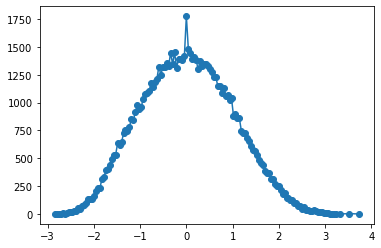

In [17]:
plt.plot(data30_freq_sorted.index,data30_freq_sorted.values,marker='o')

In [18]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

# normality test
stat, p = normaltest(data30.loc[:,"(V)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=1345.652, p=0.000
Sample does not look Gaussian (reject H0)


Estimate PDF: https://stackabuse.com/kernel-density-estimation-in-python-using-scikit-learn/

Estimate spectral density: 
https://scipy-lectures.org/intro/scipy/auto_examples/plot_spectrogram.html
https://scipy-lectures.org/intro/scipy/auto_examples/plot_spectrogram.html



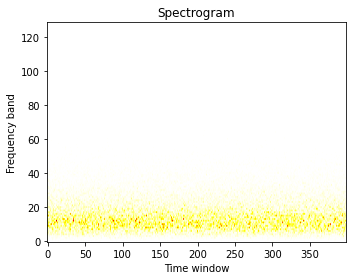

In [19]:
from scipy import signal

freqs, times, spectrogram = signal.spectrogram(data30.loc[:,"(V)"])

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

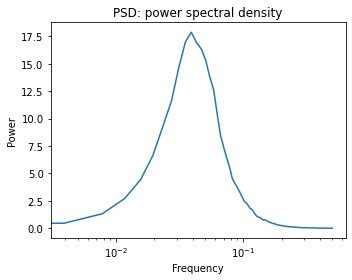

In [20]:
freqs, psd = signal.welch(data_array)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

## Estimate autocorrelation





Using statsmodels ACF  https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acf.html#statsmodels.tsa.stattools.acf

Reference: https://stackoverflow.com/questions/14297012/estimate-autocorrelation-using-python

x

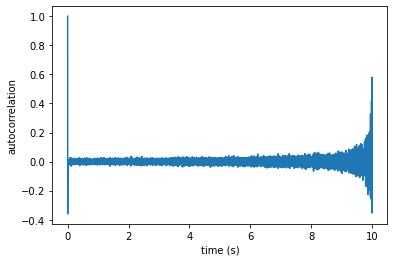

In [22]:
from numpy import *
import numpy as np
import pylab as P

fn = 'data.txt'
# x = loadtxt(fn,unpack=True,usecols=[1])
x= data30.loc[:,"(V)"]
time = data30.loc[:,"(ms)"]

def estimated_autocorrelation(x):
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    #assert N.allclose(r, N.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(np.arange(n, 0, -1)))
    return result

P.plot(time,estimated_autocorrelation(x))
P.xlabel('time (s)')
P.ylabel('autocorrelation')
P.show()